**Nothing much to do.
- you are requested to just run cells one by one sequentially 
- Ensure that you needed csv file uploaded in the same directory 

**for Needed Dependency, install pandas and matplotlib
using 
!pip install pandas matplotlib


**Reading and analyzing Data

In [78]:
import pandas as pd
df = pd.read_csv('imdb_top_1000.csv')

In [79]:
df.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

df.describe()

In [80]:
#dropping unnecessary columns by taking the needed columns only
df = df[['Series_Title' , 'Genre' ,'IMDB_Rating','Director']]
df

,Series_Title,Genre,IMDB_Rating,Director
0,The Shawshank Redemption,Drama,9.3,Frank Darabont
1,The Godfather,"Crime, Drama",9.2,Francis Ford Coppola
2,The Dark Knight,"Action, Crime, Drama",9.0,Christopher Nolan
3,The Godfather: Part II,"Crime, Drama",9.0,Francis Ford Coppola
4,12 Angry Men,"Crime, Drama",9.0,Sidney Lumet
...,...,...,...,...
995,Breakfast at Tiffany's,"Comedy, Drama, Romance",7.6,Blake Edwards
996,Giant,"Drama, Western",7.6,George Stevens
997,From Here to Eternity,"Drama, Romance, War",7.6,Fred Zinnemann
998,Lifeboat,"Drama, War",7.6,Alfred Hitchcock


In [81]:
#checking missing values
df.isnull().sum()

Series_Title    0
Genre           0
IMDB_Rating     0
Director        0
dtype: int64

In [82]:
#because in Gerne column a movie may have more than one Genre so i am going to split them into array of genres based on comma
df['Genre'] = df['Genre'].str.split(', ')
df

,Series_Title,Genre,IMDB_Rating,Director
0,The Shawshank Redemption,[Drama],9.3,Frank Darabont
1,The Godfather,"[Crime, Drama]",9.2,Francis Ford Coppola
2,The Dark Knight,"[Action, Crime, Drama]",9.0,Christopher Nolan
3,The Godfather: Part II,"[Crime, Drama]",9.0,Francis Ford Coppola
4,12 Angry Men,"[Crime, Drama]",9.0,Sidney Lumet
...,...,...,...,...
995,Breakfast at Tiffany's,"[Comedy, Drama, Romance]",7.6,Blake Edwards
996,Giant,"[Drama, Western]",7.6,George Stevens
997,From Here to Eternity,"[Drama, Romance, War]",7.6,Fred Zinnemann
998,Lifeboat,"[Drama, War]",7.6,Alfred Hitchcock


In [83]:
#now inorder to convert the column with arrays into multiple rows 
#so i can count for each value 'gerne' the frequncy of it by using the proprety values_counts
popular_genre_counts = df['Genre'].explode().value_counts()
popular_genre_counts = pd.DataFrame(popular_genre_counts.reset_index().rename(columns={'index': 'Genre', 'Genre': 'Count'}))
popular_genre_counts

,Genre,Count
0,Drama,724
1,Comedy,233
2,Crime,209
3,Adventure,196
4,Action,189
5,Thriller,137
6,Romance,125
7,Biography,109
8,Mystery,99
9,Animation,82


In [84]:
#Here getting the id of the maximum value which is the answer
position = popular_genre_counts.Count.idxmax()
most_genre = popular_genre_counts.Genre.iloc[position]
most_genre

'Drama'

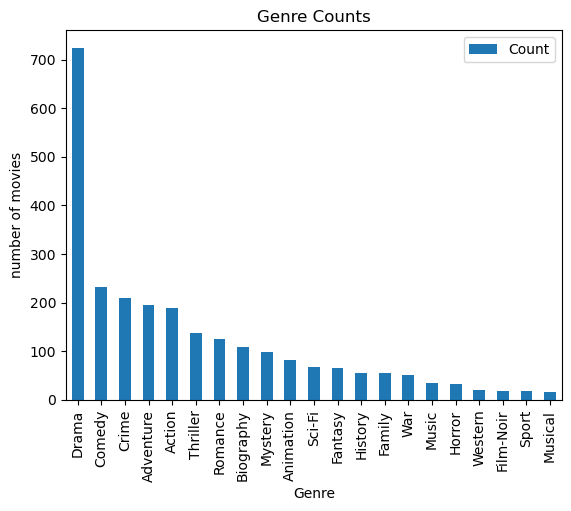

In [85]:
import matplotlib.pyplot as plt

#plotting the chart of Genre and count of movies
popular_genre_counts.plot(x='Genre', y='Count', kind='bar')
plt.xlabel('Genre')
plt.ylabel('number of movies')
plt.title('Genre Counts')
plt.show()
#here we can see that most of the movies are a Drama genre 


**For getting the director has the most top-rated movies/TV shows

In [86]:
# we are groupiing the data by director and based on the count of top rated shows we are going to get the count
counts_director = pd.DataFrame(df.groupby("Director")["IMDB_Rating"].count().reset_index().rename(columns={ 'IMDB_Rating': 'Count'}))
counts_director.sort_values('Count')

,Director,Count
0,Aamir Khan,1
337,Mikael Håfström,1
335,Michel Hazanavicius,1
334,Michel Gondry,1
333,Michael Radford,1
...,...,...
9,Akira Kurosawa,10
313,Martin Scorsese,10
179,Hayao Miyazaki,11
470,Steven Spielberg,13


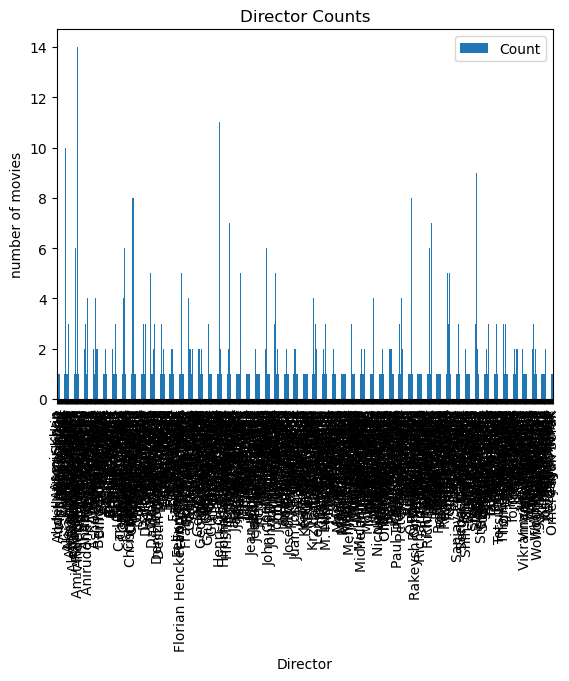

In [87]:
import matplotlib.pyplot as plt

#plotting the chart of Genre and count of movies
counts_director.plot(x='Director', y='Count', kind='bar')
plt.xlabel('Director')
plt.ylabel('number of movies')
plt.title('Director Counts')
plt.show()


In [90]:
# the pos of the director with the most movies
pos = counts_director.Count.idxmax()
pos

22

In [91]:
#Director name
most_director = counts_director.Director.iloc[pos]
most_director

'Alfred Hitchcock'

In [98]:
#something extra for analysis getting the movies of this director
moveis_mostDirector = df.loc[df.Director == most_director]
moveis_mostDirector['Genre'].explode().value_counts()

Mystery      9
Thriller     9
Drama        5
Crime        4
Romance      3
Film-Noir    3
Horror       2
Adventure    1
War          1
Name: Genre, dtype: int64

**Findings:
Here we can see that Drama moviess is more than twice of the 2nd most film (people like Drama :) or maybe the Dataset is biased to it)

**the Director 'Alfred Hitchcock' with almost 9/14 of his movies are Mystery and Thriller have the high rates, although they are not that popular